# Temperature Correction Notebook

This notebook is used for calculating temperature correction coefficients used in a polynomial fit to correct for temperature drift.

#### Workflow
- upload serial data in the form x-y-z-T (sensor should be calibrated already)
- sort T-values 
- use defined function and set the "true" absolute field measured with the G-858 at fixed location
- copy 3x3 matrix coefficients matrix to Arduino IDE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# def T_correction_coef(df,abs_true=48.205): ###Set "True" absolute magnetic field value here
#     """
#     Calculates temperature dependend magnetic field offsets for each axis:
    
#     Parameters:
#     df:      dataframe containing x-y-z-T
#     T0:      reference temperature which will be used as basis for the magnetic field offets

#     Returns: 
#     offets:  array containing offets for the three axis
#     """
    
#     T = df['T']
#     df["mag_abs"] = np.sqrt(df["x"]**2+df["y"]**2+df["z"]**2)
#     mag_abs = df["mag_abs"]
#     offsets = np.zeros((len(df),3))
     
#     Bx0 = df.iloc[abs(mag_abs - abs_true).idxmin()].iloc[0]
#     By0 = df.iloc[abs(mag_abs - abs_true).idxmin()].iloc[1]
#     Bz0 = df.iloc[abs(mag_abs - abs_true).idxmin()].iloc[2]

#     offsets[:,0] = Bx0 - df["x"]
#     offsets[:,1] = By0 - df["y"]
#     offsets[:,2] = Bz0 - df["z"]

#     T_coef =  np.zeros((3,3))
#     T_coef[0,:] = np.polyfit(T,offsets[:,0],2)
#     T_coef[1,:] = np.polyfit(T,offsets[:,1],2)
#     T_coef[2,:] = np.polyfit(T,offsets[:,2],2)
#     return(T_coef)

def T_correction_coef(df,T0=25):
    """
    Calculates temperature dependend magnetic field offsets for each axis:
    
    Parameters:
    df:      dataframe containing x-y-z-T
    T0:      reference temperature which will be used as basis for the magnetic field offets

    Returns: 
    offets:  array containing offets for the three axis
    """
    T = df['T']
    offsets = np.zeros((len(df),3))
    Bx0 = df.iloc[abs(T - T0).idxmin()].iloc[0]
    By0 = df.iloc[abs(T - T0).idxmin()].iloc[1]
    Bz0 = df.iloc[abs(T - T0).idxmin()].iloc[2]
    offsets[:,0] = Bx0 - df["x"]
    offsets[:,1] = By0 - df["y"]
    offsets[:,2] = Bz0 - df["z"]

    T_coef =  np.zeros((3,3))
    T_coef[0,:] = np.polyfit(T,offsets[:,0],2)
    T_coef[1,:] = np.polyfit(T,offsets[:,1],2)
    T_coef[2,:] = np.polyfit(T,offsets[:,2],2)
    return(T_coef)

*ESP-Magnetometer-1*

ESP-Magnetometer-1


array([[-1.10318387e-03,  1.65040045e-01, -3.99251127e+00],
       [ 4.26082971e-04, -4.75875583e-01,  1.39796128e+01],
       [-1.45040322e-03, -1.52003606e-01,  5.86652956e+00]])

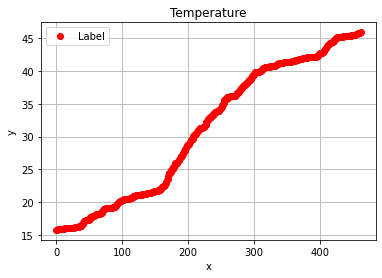

In [18]:
df  = pd.read_csv(r"C:\Users\julik\sciebo\Arduino\Final\Data\Temperature\T1_1.txt",delim_whitespace=True,names=["x","y","z","T"])
#Sorting data by temperature
df.sort_values(by='T',ascending=True,inplace=True)
df.reset_index(drop=True,inplace=True)

fig,ax = plt.subplots()
ax.plot(df["T"],"ro",label="Label",)

ax.set(title="Temperature",xlabel="x",ylabel="y")
ax.grid()
ax.legend()
coeff = T_correction_coef(df,T0=np.mean(df["T"]))
# coeff = T_correction_coef(df,df[])
print("ESP-Magnetometer-1")
coeff

ESP-Magnetometer-1


array([[-2.37944779e-04,  7.77412735e-02, -2.51935955e+00],
       [ 2.09523028e-03, -7.76919674e-01,  2.17973632e+01],
       [-7.41018719e-04, -3.18939810e-01,  1.09291899e+01]])

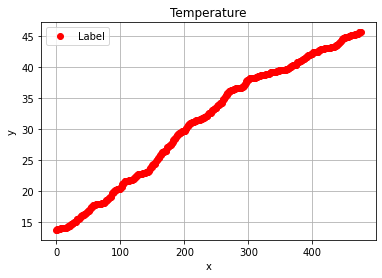

In [19]:
df  = pd.read_csv(r"C:\Users\julik\sciebo\Arduino\Final\Data\Temperature\T2.txt",delim_whitespace=True,names=["x","y","z","T"])
#Sorting data by temperature
df.sort_values(by='T',ascending=True,inplace=True)
df.reset_index(drop=True,inplace=True)

fig,ax = plt.subplots()
ax.plot(df["T"],"ro",label="Label",)

ax.set(title="Temperature",xlabel="x",ylabel="y")
ax.grid()
ax.legend()
coeff = T_correction_coef(df,T0=np.mean(df["T"]))
# coeff = T_correction_coef(df,df[])
print("ESP-Magnetometer-1")
coeff

*ESP-Magnetometer-3*

ESP-Magnetometer-3


array([[-2.16545778e-03,  2.03949572e-01, -4.66051830e+00],
       [-2.18183398e-03, -1.01076680e-01,  5.81346154e+00],
       [-2.24857540e-03, -1.63650788e-01,  6.87485484e+00]])

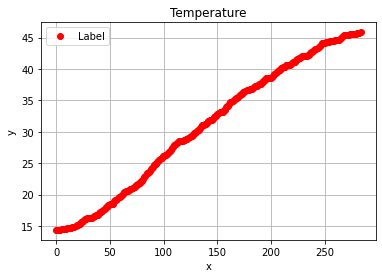

In [4]:
df  = pd.read_csv(r"C:\Users\julik\sciebo\Arduino\Final\Data\Temperature\T3 (2).txt",delim_whitespace=True,names=["x","y","z","T"])
#Sorting data by temperature
df.sort_values(by='T',ascending=True,inplace=True)
df.reset_index(drop=True,inplace=True)

fig,ax = plt.subplots()
ax.plot(df["T"],"ro",label="Label",)

ax.set(title="Temperature",xlabel="x",ylabel="y")
ax.grid()
ax.legend()
coeff = T_correction_coef(df,T0=np.mean(df["T"]))
# coeff = T_correction_coef(df,48.35)

print("ESP-Magnetometer-3")
coeff

*ESP-Magnetometer-4*

ESP-Magnetometer-4


array([[-1.88691658e-03,  7.39156159e-02,  1.16362765e-01],
       [ 3.06965038e-04, -5.61819484e-01,  2.56562761e+01],
       [-9.96968219e-04, -1.68164668e-01,  9.44843893e+00]])

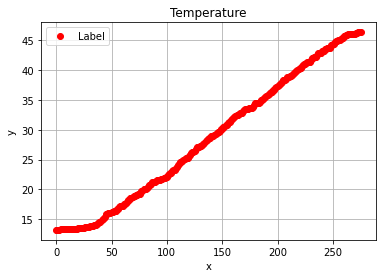

In [5]:
df  = pd.read_csv(r"C:\Users\julik\sciebo\Arduino\Final\Data\Temperature\T4_2.txt",delim_whitespace=True,names=["x","y","z","T"])
#Sorting data by temperature
df.sort_values(by='T',ascending=True,inplace=True)
df.reset_index(drop=True,inplace=True)

fig,ax = plt.subplots()
ax.plot(df["T"],"ro",label="Label",)

ax.set(title="Temperature",xlabel="x",ylabel="y")
ax.grid()
ax.legend()

# coeff = T_correction_coef(df,T0=np.mean(df["T"]))
coeff = T_correction_coef(df,48.35)

print("ESP-Magnetometer-4")
coeff

*ESP-Magnetometer-5*

ESP-Magnetometer-5


array([[-2.63720047e-03,  2.30256612e-01, -4.29327963e+00],
       [ 2.12523189e-03, -5.59917300e-01,  1.61745015e+01],
       [ 2.82593583e-04, -3.30714272e-01,  1.05105069e+01]])

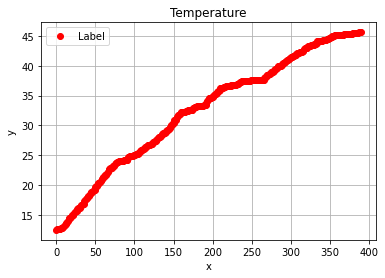

In [6]:
df  = pd.read_csv(r"C:\Users\julik\sciebo\Arduino\Final\Data\Temperature\T5.txt",delim_whitespace=True,names=["x","y","z","T"])
#Sorting data by temperature
df.sort_values(by='T',ascending=True,inplace=True)
df.reset_index(drop=True,inplace=True)

fig,ax = plt.subplots()
ax.plot(df["T"],"ro",label="Label",)

ax.set(title="Temperature",xlabel="x",ylabel="y")
ax.grid()
ax.legend()


coeff = T_correction_coef(df,T0=np.mean(df["T"]))
print("ESP-Magnetometer-5")
coeff

*ESP-Magnetometer-6*

ESP-Magnetometer-6


array([[-2.52660671e-03,  3.03545950e-01, -6.87752519e+00],
       [ 1.02874266e-03, -5.85238458e-01,  1.66374867e+01],
       [-7.16005840e-04, -2.97275069e-01,  9.52670151e+00]])

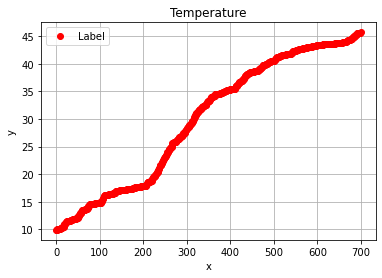

In [7]:
df  = pd.read_csv(r"C:\Users\julik\sciebo\Arduino\Final\Data\Temperature\T6.txt",delim_whitespace=True,names=["x","y","z","T"])
#Sorting data by temperature
df.sort_values(by='T',ascending=True,inplace=True)
df.reset_index(drop=True,inplace=True)

fig,ax = plt.subplots()
ax.plot(df["T"],"ro",label="Label",)

ax.set(title="Temperature",xlabel="x",ylabel="y")
ax.grid()
ax.legend()

coeff = T_correction_coef(df,T0=np.mean(df["T"]))
print("ESP-Magnetometer-6")
coeff

*ESP-Magnetometer-7*

ESP-Magnetometer-7


array([[-1.38000665e-03,  2.07615846e-02,  1.06572219e+00],
       [ 5.23453231e-04, -4.09581094e-01,  1.43835176e+01],
       [-1.88291074e-03, -1.47897213e-01,  7.78574464e+00]])

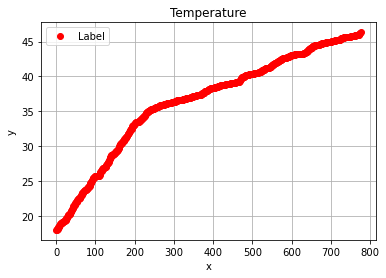

In [8]:
df  = pd.read_csv(r"C:\Users\julik\sciebo\Arduino\Final\Data\Temperature\T7.txt",delim_whitespace=True,names=["x","y","z","T"])
#Sorting data by temperature
df.sort_values(by='T',ascending=True,inplace=True)
df.reset_index(drop=True,inplace=True)

fig,ax = plt.subplots()
ax.plot(df["T"],"ro",label="Label",)

ax.set(title="Temperature",xlabel="x",ylabel="y")
ax.grid()
ax.legend()


coeff = T_correction_coef(df,T0=np.mean(df["T"]))
print("ESP-Magnetometer-7")
coeff

*ESP-Magnetometer-8*

ESP-Magnetometer-8


array([[-1.60305272e-03,  1.81750187e-01, -3.88712992e+00],
       [ 1.20618281e-03, -5.10414880e-01,  1.40412705e+01],
       [-8.56495399e-04, -1.98148504e-01,  6.43997339e+00]])

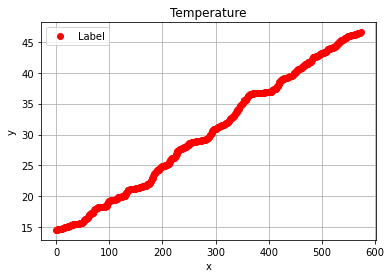

In [9]:
df  = pd.read_csv(r"C:\Users\julik\sciebo\Arduino\Final\Data\Temperature\T8.txt",delim_whitespace=True,names=["x","y","z","T"])
#Sorting data by temperature
df.sort_values(by='T',ascending=True,inplace=True)
df.reset_index(drop=True,inplace=True)

fig,ax = plt.subplots()
ax.plot(df["T"],"ro",label="Label",)

ax.set(title="Temperature",xlabel="x",ylabel="y")
ax.grid()
ax.legend()

coeff = T_correction_coef(df,T0=np.mean(df["T"]))
print("ESP-Magnetometer-8")
coeff

*ESP-Magnetometer-9*

ESP-Magnetometer-9


array([[-5.74520421e-04, -3.26585112e-02,  2.04248789e+00],
       [ 2.01285214e-03, -8.05596228e-01,  2.45015382e+01],
       [-7.22594149e-04, -2.55751057e-01,  9.53791334e+00]])

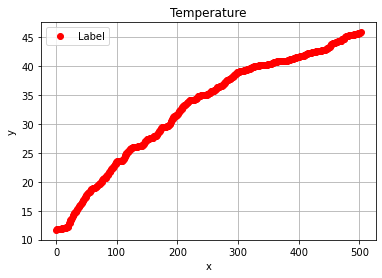

In [10]:
df  = pd.read_csv(r"C:\Users\julik\sciebo\Arduino\Final\Data\Temperature\T9.txt",delim_whitespace=True,names=["x","y","z","T"])
#Sorting data by temperature
df.sort_values(by='T',ascending=True,inplace=True)
df.reset_index(drop=True,inplace=True)

fig,ax = plt.subplots()
ax.plot(df["T"],"ro",label="Label",)

ax.set(title="Temperature",xlabel="x",ylabel="y")
ax.grid()
ax.legend()


coeff = T_correction_coef(df,T0=np.mean(df["T"]))
print("ESP-Magnetometer-9")
coeff

*ESP-Magnetometer-10*

ESP-Magnetometer-10


array([[-1.67403811e-03,  7.43341031e-02, -1.01350341e+00],
       [ 1.11249832e-03, -5.63636575e-01,  1.51912766e+01],
       [-1.04522825e-03, -2.21132691e-01,  6.96503482e+00]])

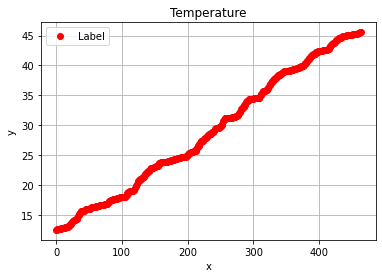

In [11]:
df  = pd.read_csv(r"C:\Users\julik\sciebo\Arduino\Final\Data\Temperature\T10.txt",delim_whitespace=True,names=["x","y","z","T"])
#Sorting data by temperature
df.sort_values(by='T',ascending=True,inplace=True)
df.reset_index(drop=True,inplace=True)

fig,ax = plt.subplots()
ax.plot(df["T"],"ro",label="Label",)

ax.set(title="Temperature",xlabel="x",ylabel="y")
ax.grid()
ax.legend()


coeff = T_correction_coef(df,T0=np.mean(df["T"]))
print("ESP-Magnetometer-10")
coeff

*ESP-Magnetometer-11*

ESP-Magnetometer-11


array([[-1.13462803e-03,  8.51940064e-02, -1.28214711e+00],
       [ 1.37009681e-03, -4.07809193e-01,  1.21690859e+01],
       [ 1.04265592e-03, -5.24785804e-01,  1.70581491e+01]])

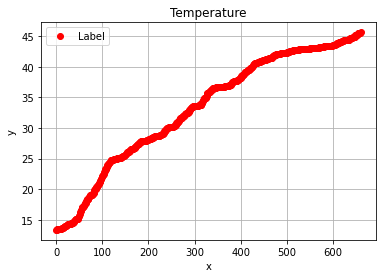

In [12]:
df  = pd.read_csv(r"C:\Users\julik\sciebo\Arduino\Final\Data\Temperature\T11.txt",delim_whitespace=True,names=["x","y","z","T"])
#Sorting data by temperature
df.sort_values(by='T',ascending=True,inplace=True)
df.reset_index(drop=True,inplace=True)

fig,ax = plt.subplots()
ax.plot(df["T"],"ro",label="Label",)

ax.set(title="Temperature",xlabel="x",ylabel="y")
ax.grid()
ax.legend()


coeff = T_correction_coef(df,T0=np.mean(df["T"]))
print("ESP-Magnetometer-11")
coeff

*ESP-Magnetometer-12*

ESP-Magnetometer-12


array([[-8.86682680e-04, -1.90060920e-03,  1.03406232e+00],
       [-6.69500441e-04, -3.13905005e-01,  1.05741399e+01],
       [-4.60597071e-04, -2.65830694e-01,  8.77977923e+00]])

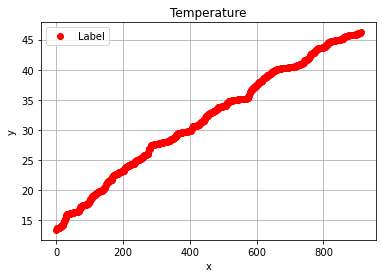

In [13]:
df  = pd.read_csv(r"C:\Users\julik\sciebo\Arduino\Final\Data\Temperature\T12.txt",delim_whitespace=True,names=["x","y","z","T"])
#Sorting data by temperature
df.sort_values(by='T',ascending=True,inplace=True)
df.reset_index(drop=True,inplace=True)

fig,ax = plt.subplots()
ax.plot(df["T"],"ro",label="Label",)

ax.set(title="Temperature",xlabel="x",ylabel="y")
ax.grid()
ax.legend()

coeff = T_correction_coef(df,T0=np.mean(df["T"]))
print("ESP-Magnetometer-12")
coeff

*ESP-Magnetometer-13*

ESP-Magnetometer-13


array([[-2.67898734e-03,  2.03064976e-01, -4.13089313e+00],
       [ 5.37311348e-04, -4.85369433e-01,  1.48336986e+01],
       [-3.11173377e-04, -4.02823531e-01,  1.38387533e+01]])

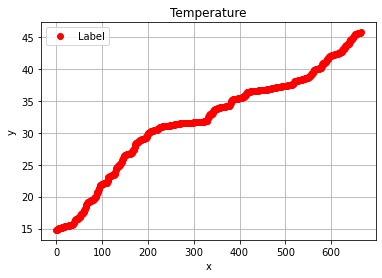

In [14]:
df  = pd.read_csv(r"C:\Users\julik\sciebo\Arduino\Final\Data\Temperature\T13.txt",delim_whitespace=True,names=["x","y","z","T"])
#Sorting data by temperature
df.sort_values(by='T',ascending=True,inplace=True)
df.reset_index(drop=True,inplace=True)

fig,ax = plt.subplots()
ax.plot(df["T"],"ro",label="Label",)

ax.set(title="Temperature",xlabel="x",ylabel="y")
ax.grid()
ax.legend()

coeff = T_correction_coef(df,T0=np.mean(df["T"]))
print("ESP-Magnetometer-13")
coeff

*ESP-Magnetometer-14*

ESP-Magnetometer-14


array([[-7.32341840e-04, -3.27481874e-02,  1.76894176e+00],
       [ 1.39695413e-03, -6.68557756e-01,  1.99955566e+01],
       [-1.00336774e-03, -2.89388527e-01,  1.05682381e+01]])

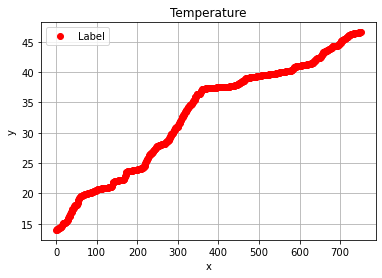

In [15]:
df  = pd.read_csv(r"C:\Users\julik\sciebo\Arduino\Final\Data\Temperature\T14.txt",delim_whitespace=True,names=["x","y","z","T"])
#Sorting data by temperature
df.sort_values(by='T',ascending=True,inplace=True)
df.reset_index(drop=True,inplace=True)

fig,ax = plt.subplots()
ax.plot(df["T"],"ro",label="Label",)

ax.set(title="Temperature",xlabel="x",ylabel="y")
ax.grid()
ax.legend()

coeff = T_correction_coef(df,T0=np.mean(df["T"]))
print("ESP-Magnetometer-14")
coeff

*ESP-Magnetometer-15*

In [16]:
df  = pd.read_csv(r"C:\Users\julik\sciebo\Arduino\Final\Data\Temperature\T15.txt",delim_whitespace=True,names=["x","y","z","T"])
#Sorting data by temperature
df.sort_values(by='T',ascending=True,inplace=True)
df.reset_index(drop=True,inplace=True)

fig,ax = plt.subplots()
ax.plot(df["T"],"ro",label="Label",)

ax.set(title="Temperature",xlabel="x",ylabel="y")
ax.grid()
ax.legend()

coeff = T_correction_coef(df,T0=np.mean(df["T"]))
print("ESP-Magnetometer-15")
coeff

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\julik\\sciebo\\Arduino\\Final\\Data\\Temperature\\T15.txt'